In [53]:
from sklearn.cluster import *
import scipy
import copy
import numpy as np
from matplotlib import pyplot as plt
from Bio import AlignIO
import pickle
import h5py
import itertools
import dendropy
import numpy as np
import os
os.environ['MKL_ENABLE_INSTRUCTIONS'] = 'AVX2'

In [54]:
#16s rna dataset from 'Detecting the Coevolution of Biosequences—An Example of RNA Interaction Prediction' 
import glob
treefile = './16s/16saln_clustalo.fasta.treefile'
alnfile = './16s/16saln_clustalo_replaceU.fasta'
events = './16s/16saln_clustalo_replaceU.fastasparsemat_AAtransitionbootstrap_runbootstrap_run_transition_b*_coevmat.pkl'
eventmats = glob.glob(events)

In [55]:
print(eventmats)

["./16s/16saln_clustalo_replaceU.fastasparsemat_AAtransitionbootstrap_runbootstrap_run_transition_b'TC'_coevmat.pkl", "./16s/16saln_clustalo_replaceU.fastasparsemat_AAtransitionbootstrap_runbootstrap_run_transition_b'TG'_coevmat.pkl", "./16s/16saln_clustalo_replaceU.fastasparsemat_AAtransitionbootstrap_runbootstrap_run_transition_b'AC'_coevmat.pkl", "./16s/16saln_clustalo_replaceU.fastasparsemat_AAtransitionbootstrap_runbootstrap_run_transition_b'GA'_coevmat.pkl", "./16s/16saln_clustalo_replaceU.fastasparsemat_AAtransitionbootstrap_runbootstrap_run_transition_b'CA'_coevmat.pkl", "./16s/16saln_clustalo_replaceU.fastasparsemat_AAtransitionbootstrap_runbootstrap_run_transition_b'AG'_coevmat.pkl", "./16s/16saln_clustalo_replaceU.fastasparsemat_AAtransitionbootstrap_runbootstrap_run_transition_b'AT'_coevmat.pkl", "./16s/16saln_clustalo_replaceU.fastasparsemat_AAtransitionbootstrap_runbootstrap_run_transition_b'TA'_coevmat.pkl", "./16s/16saln_clustalo_replaceU.fastasparsemat_AAtransitionboot

<AxesSubplot:>

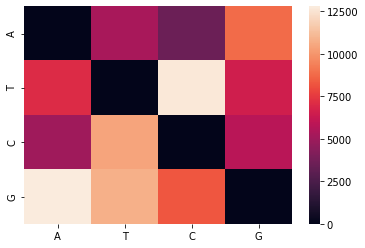

In [56]:
import seaborn as sns
mapping = {'A':0 , 'T':1 , 'C':2 ,'G':3 }
transitionmat = np.zeros( (4,4))
for outsankof in eventmats:
    transition_type = outsankof.replace('./16s/16saln_clustalo_replaceU.fastasparsemat_AAtransitionbootstrap_runbootstrap_run_transition_b'  , '')
    transition_type = transition_type.replace( '_coevmat.pkl' , '')
    transition_type = transition_type.replace("'" , '')
    with open( outsankof , 'rb') as matin:
        coevmat = pickle.loads(matin.read())
    row = mapping[ transition_type[0] ]
    col = mapping[ transition_type[1] ]
    
    transitionmat[row,col] = coevmat[1].sum()
sns.heatmap(transitionmat, xticklabels= mapping.keys( ) , yticklabels=mapping.keys())    

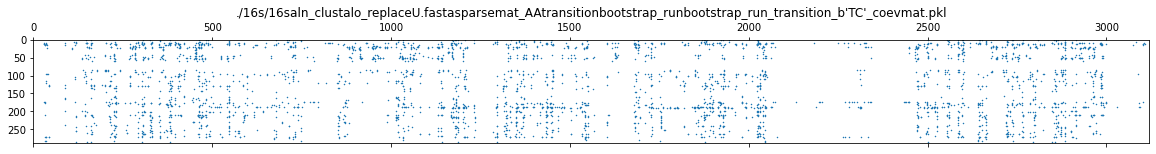

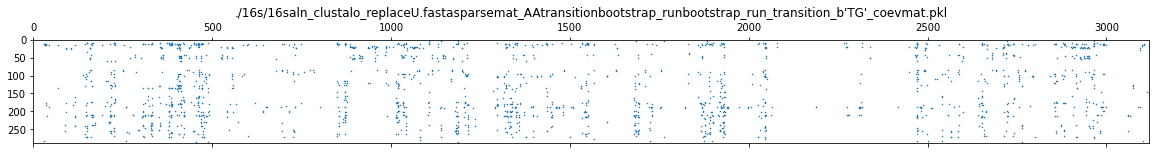

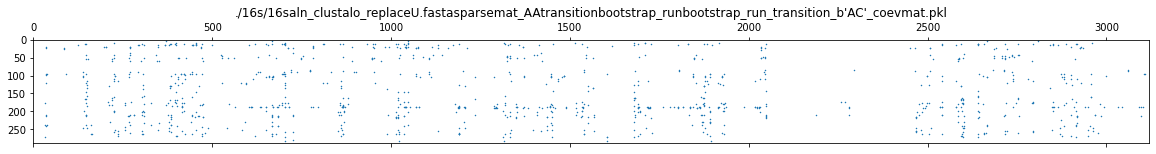

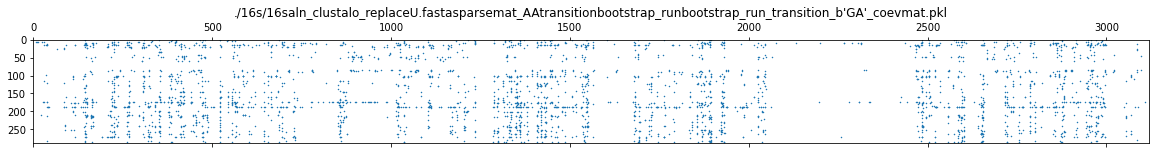

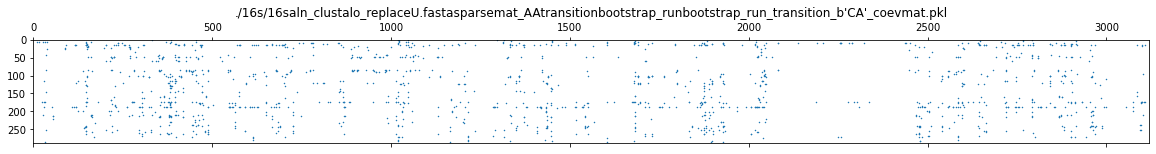

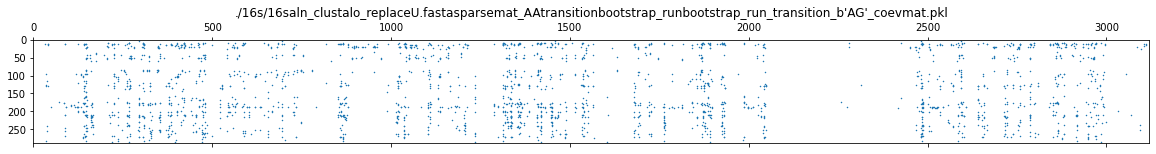

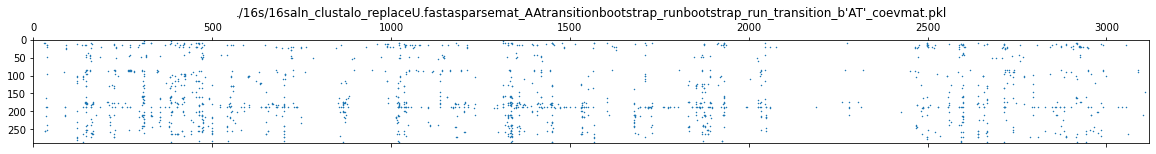

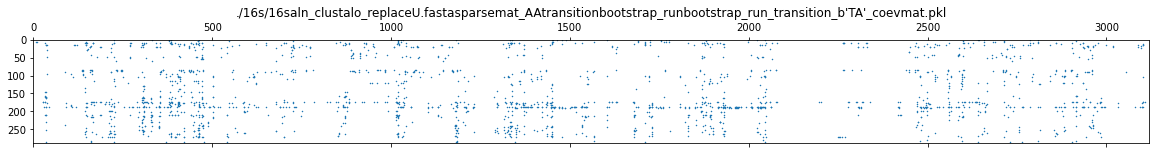

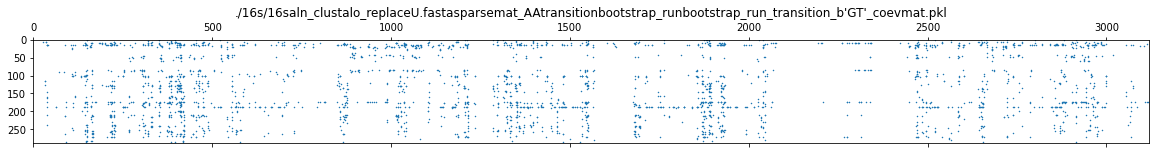

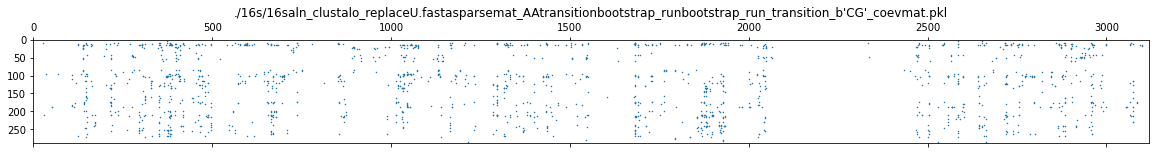

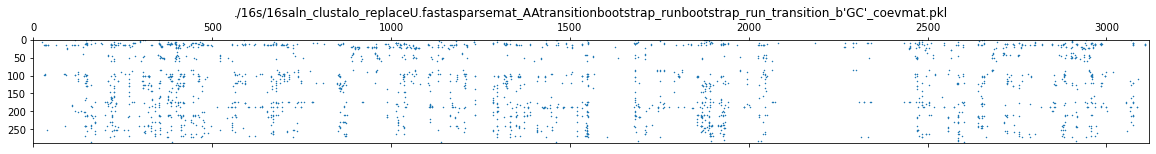

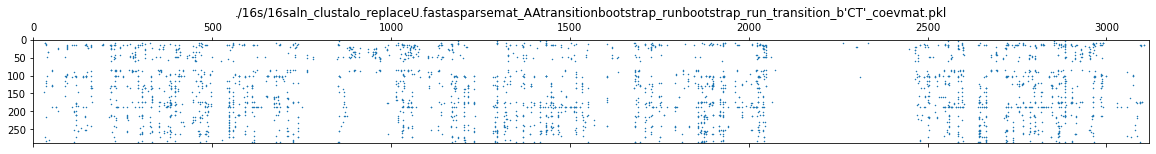

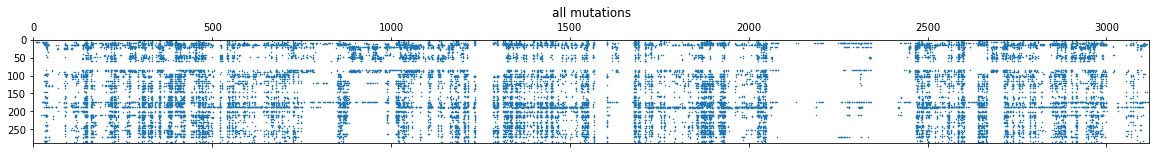

[matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), mat

In [57]:
tensor = []
for i,outsankof in enumerate(eventmats):
   
    with open( outsankof , 'rb') as matin:
        coevmat = pickle.loads(matin.read())[1]
    if i == 0:
        globalmat = coevmat
    else:
        globalmat+= coevmat
    tensor.append(coevmat.todense())
    
    plt.figure(figsize=(20,10))
    plt.spy(coevmat, markersize= .5)
    plt.title(outsankof)
    plt.show()

plt.figure(figsize=(20,10))
plt.title('all mutations')
plt.spy(globalmat,markersize= .5)
plt.show()

globalmat = globalmat.todense()
print(tensor)

bigstack = np.vstack(tensor)

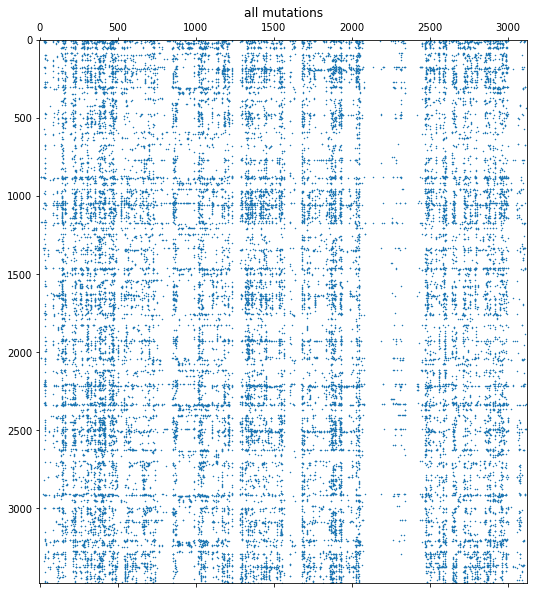

In [59]:
plt.figure(figsize=(20,10))

plt.title('all mutations')
plt.spy(bigstack,markersize= .5)
plt.show()


In [41]:
#represent the columns on  tree

from colour import Color

#give a color to each mutation type

mapping = {'A':0 , 'T':1 , 'C':2 ,'G':3 }
transitionmat = np.zeros( (4,4))
for outsankof in eventmats:
    transition_type = outsankof.replace('./16s/16saln_clustalo_replaceU.fastasparsemat_AAtransitionbootstrap_runbootstrap_run_transition_b'  , '')
    transition_type = transition_type.replace( '_coevmat.pkl' , '')
    transition_type = transition_type.replace("'" , '')
    #rows correspond to branches
    

#vis the tree w colors for each mutation and aln char at the tips



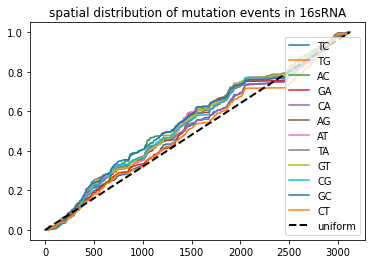

In [42]:
for outsankof in eventmats:

    transition_type = outsankof.replace('./16s/16saln_clustalo_replaceU.fastasparsemat_AAtransitionbootstrap_runbootstrap_run_transition_b'  , '')
    transition_type = transition_type.replace( '_coevmat.pkl' , '')
    transition_type = transition_type.replace("'" , '')
    with open( outsankof , 'rb') as matin:
        coevmat = pickle.loads(matin.read())[1]
    coevmat = coevmat.todense()
    
    sumv = np.sum(coevmat , axis = 0)
    cdf = np.array( np.cumsum(sumv) / np.sum(sumv))
    plt.plot( cdf[0] , label= transition_type  )
    
cdf_uniform = np.cumsum(np.ones(len(cdf.ravel())) ) / np.sum(len(cdf.ravel()))

plt.plot(cdf_uniform, lw = 2 , ls = 'dashed' , c = 'black' , label= 'uniform')
plt.legend()
plt.title( 'spatial distribution of mutation events in 16sRNA' )
plt.show()

'cy.Mic.aer 1-1555'
'cy.Osc.aga 1-1485'
'cy.Tri.ten 1-1478'
'cy.Pho.amb 1-1477'
'pl.Zea.may 1-1809'
'pl.Pan.gin 1-1811'
'pl.Lyc.esc 1-1800'
'pl.Sol.tub 1-1807'
'pl.Ara.tha 1-1804'
'pl.Gly.max 1-1807'
146
leaves
290
nodes


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/scipy/sparse/_index.py:127: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


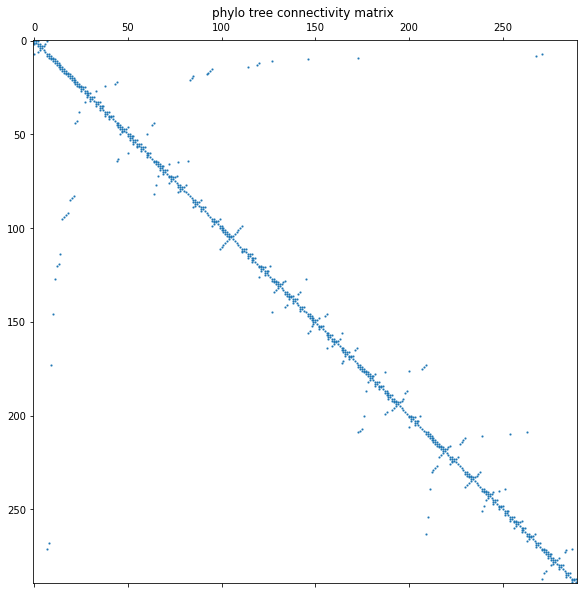

In [43]:
#use tree to blur eventmat
tree = dendropy.Tree.get(
    path=treefile,
    schema='newick')
for l in tree.leaf_nodes()[0:10]:
    print(str(l.taxon))
print(len(tree.leaf_nodes()))
print('leaves')

for i,n in enumerate(tree.nodes()):
    n.matrow = i
    n.symbols = None
    n.scores = None
    n.event = None
    n.char = None
matsize = len(tree.nodes())
print(matsize)
print('nodes')

#blur w connectivity mat
blurfactor =  .5
bluriter = 4
connectmat = scipy.sparse.csc_matrix((len(tree.nodes()), len(tree.nodes() ) ) )

index = np.array([ [n.matrow, c.matrow ] for n in tree.nodes() for c in n.child_nodes()])
#fill diagonal
index = np.vstack( [index , np.array([ [n.matrow, n.matrow ] for n in tree.nodes() ]) ] )
connectmat[index[:,0],index[:,1]] = 1
connectmat[index[:,1],index[:,0]] = 1
connectmat = connectmat.todense()
plt.figure( figsize=(10,10))
plt.title( 'phylo tree connectivity matrix ' )
plt.spy(connectmat, markersize= 1)
plt.show()

0
1


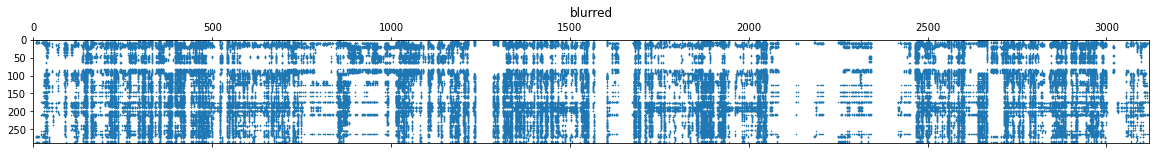

In [44]:
#use rbm ising model to capture features
bluriter = 2
for k in range( bluriter):
    globalmat += np.dot(blurfactor*connectmat, globalmat)
    print(k)
plt.figure( figsize=(20,20) )
plt.title( 'blurred' )
plt.spy(globalmat, markersize= .5)
plt.show()
#branch time and mutation rate prob has an impact on how much we should blur

In [50]:
from sklearn.decomposition import NMF
nmf = NMF(n_components= 500 , init='warn', solver='cd', beta_loss='frobenius', tol=0.0001, max_iter=200, random_state=None, alpha=0.0   )
nmf.fit( bigstack.T )
components_ = nmf.components_


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/sklearn/decomposition/nmf.py:1028: FutureWarning: The default value of init will change from random to None in 0.23 to make it consistent with decomposition.NMF.
  "with decomposition.NMF.", FutureWarning)


In [60]:
from sklearn.cluster import OPTICS , MiniBatchKMeans
clust = MiniBatchKMeans(n_clusters=200, init='k-means++', max_iter=100, batch_size=100, verbose=0, compute_labels=True, random_state=None, tol=0.0, max_no_improvement=10, init_size=None, n_init=3, reassignment_ratio=0.01)
clust.fit( globalmat.T )

#clust = OPTICS(min_samples=50, xi=.05, min_cluster_size=.05 , n_jobs = -1)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=200, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [61]:
print(clust.labels_)
l,c = np.unique( clust.labels_ , return_counts= True)

print(l)
print(c)

[10 10 10 ... 10 10 10]
[  0   1   2   3   4   5   6   7   8   9  10  13  14  15  16  18  19  20
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  70  71  72  73  74  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 159 160 161 162 163 164 165 166 168 169 170 171
 172 174 175 176 177 178 179 180 181 182 183 186 191 193 194 196 197 198
 199]
[ 136    1   20    2    4   14  109   40   23   14 1021    1    1   33
   11    1   13    1    2   12    2    1    3    1    1   20   30    3
    2    3    2    6   19    2    1    1    1    1    3    4    7    1
   18   29    2    2    2  

In [ ]:
for label in l:
    

In [118]:
#matrix factorization
from nimfa.models.nmf_ns import Nmf_ns
from sklearn.preprocessing import RobustScaler , StandardScaler

import nimfa

scaler = RobustScaler()
globalmat_scaled = scaler.fit_transform(globalmat.T)
lsnmf = nimfa.Lsnmf(globalmat_scaled.T , seed='random_vcol', rank=30, max_iter=1000)
lsnmf_fit = lsnmf()

print('Rss: %5.4f' % lsnmf_fit.fit.rss())
print('Evar: %5.4f' % lsnmf_fit.fit.evar())
print('K-L divergence: %5.4f' % lsnmf_fit.distance(metric='kl'))
print('Sparseness, W: %5.4f, H: %5.4f' % lsnmf_fit.fit.sparseness())
#lsnmf = nimfa.Lsnmf( globalmat , seed="random_vcol", rank=10, max_iter=12, sub_iter=10, inner_sub_iter=10, beta=0.1)
#lsnmf_fit = lsnmf()


Rss: 227790.1399
Evar: 0.6229
K-L divergence: 92149.0718
Sparseness, W: 0.9308, H: 0.8526


(3120, 3120)


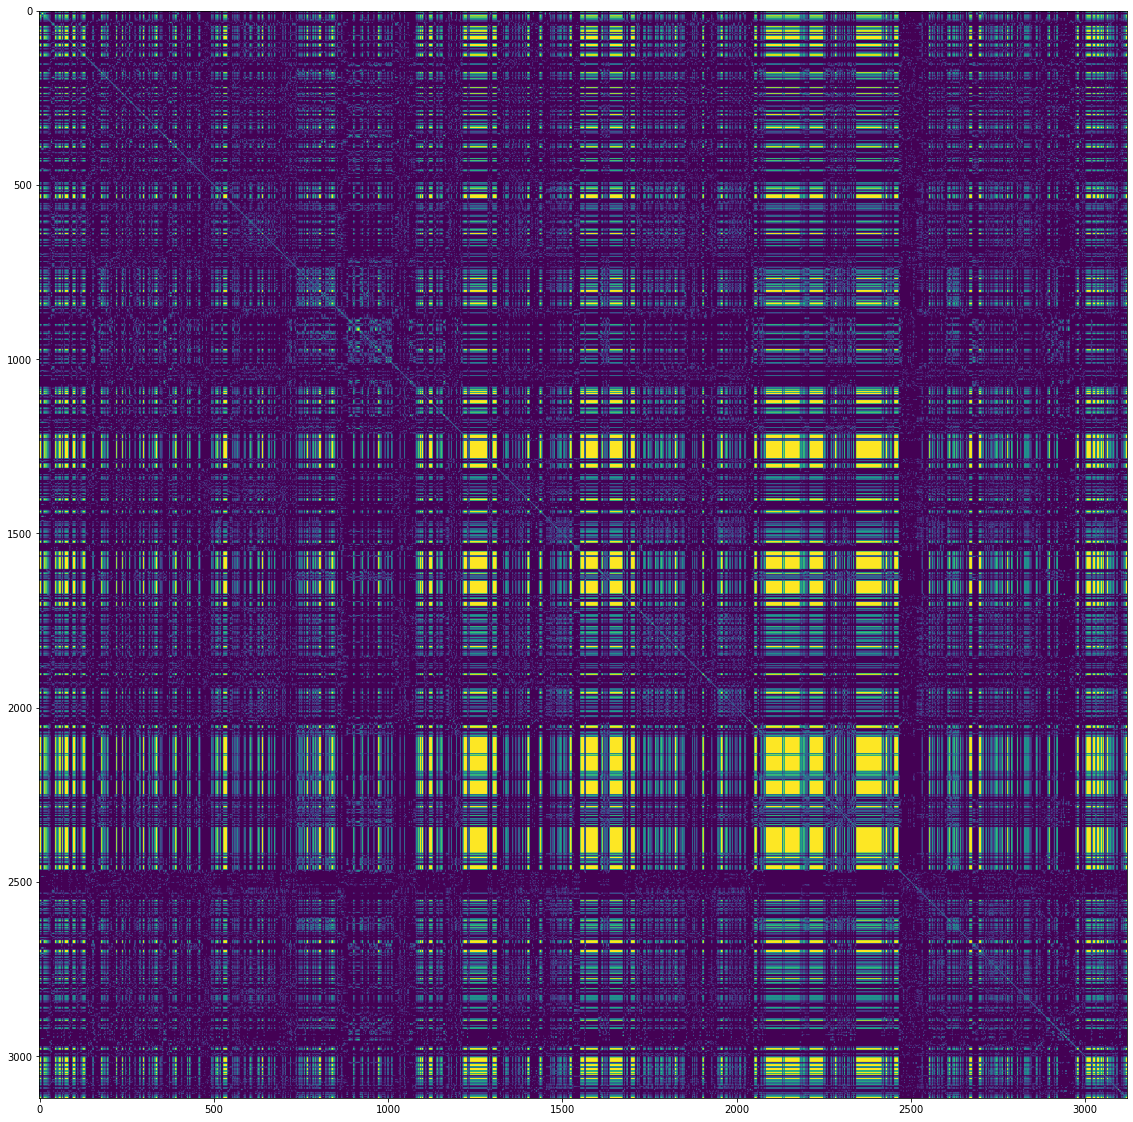

In [119]:
connectivity = lsnmf.connectivity()
print(connectivity.shape)
plt.figure(figsize=(20,20))
plt.imshow(connectivity)

In [92]:
from Bio.PDB import MMCIFParser
from Bio.PDB.mmcifio import MMCIFIO
parser = MMCIFParser()
structure = parser.get_structure("4v9d", "./16s/4v9d.cif")
io=MMCIFIO()
io.set_structure(structure)

/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain AA is discontinuous at line 290127.
  PDBConstructionWarning,
/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain BA is discontinuous at line 290199.
  PDBConstructionWarning,
/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain CA is discontinuous at line 290255.
  PDBConstructionWarning,
/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain CB is discontinuous at line 290449.
  PDBConstructionWarning,
/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/Bio/PDB/StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain CQ is discontinuous at line

In [112]:
#grab RNA
totalatoms = [ r for r in structure.get_residues() if r.get_resname() in {'A', 'U' , 'C' , 'G'}]
print([ a.get_name() for a in totalatoms[0].get_atoms() ])

['P', 'OP1', 'OP2', "O5'", "C5'", "C4'", "O4'", "C3'", "O3'", "C2'", "O2'", "C1'", 'N9', 'C8', 'N7', 'C5', 'C6', 'N6', 'N1', 'C2', 'N3', 'C4']


In [115]:
#measure from phosphorus to phosphorus
distmat = np.array([ [a1['P'] - a2['P']  if (i<j and 'P' in a1 and 'P' in a2) else 0 for i,a1 in enumerate(totalatoms) ] for j,a2 in enumerate(totalatoms)])


In [116]:
distmat+= distmat.T


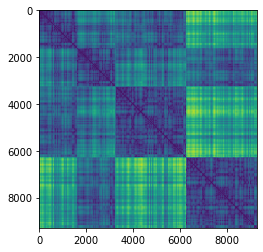

In [117]:
plt.imshow(distmat)


In [11]:
print(components_.shape)
weights = components_

(500, 3120)


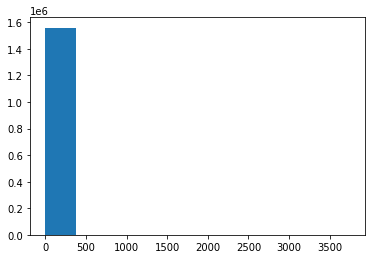

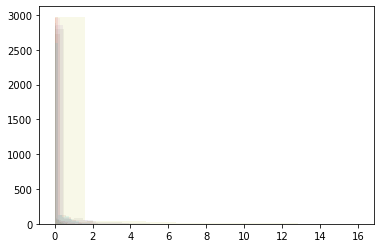

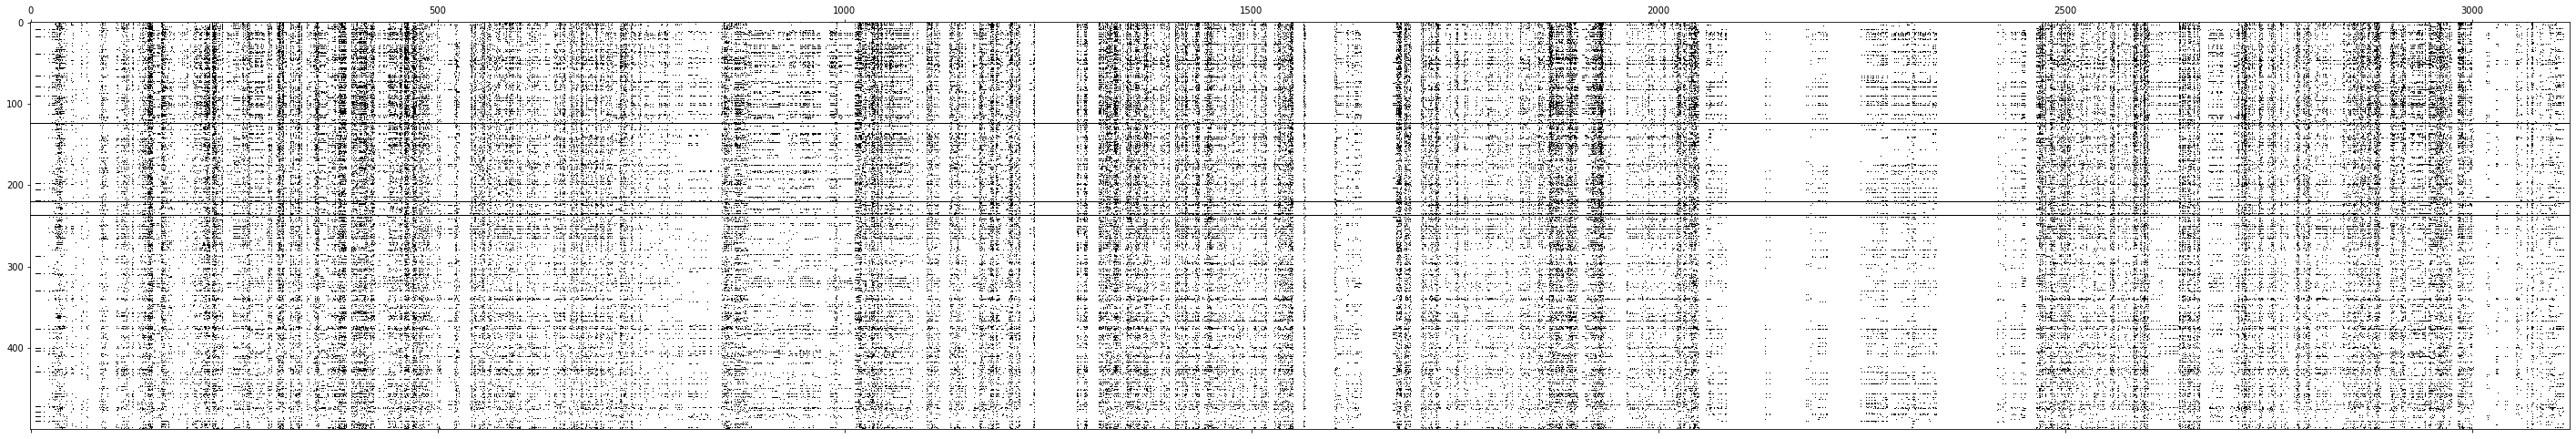

In [13]:
plt.hist(weights.ravel())
plt.show()

for col in range(10):
    plt.hist( weights[ col , :  ], alpha = .1 )
    
plt.show()

plt.figure( figsize =(50,50))

plt.spy( weights )
plt.show()

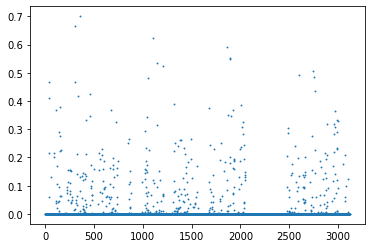

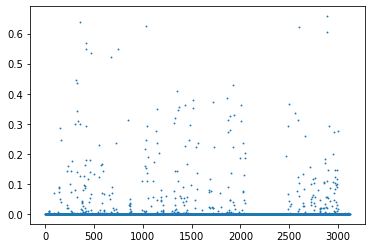

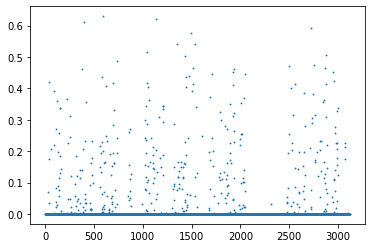

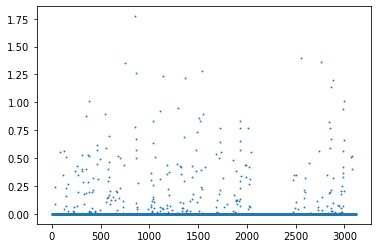

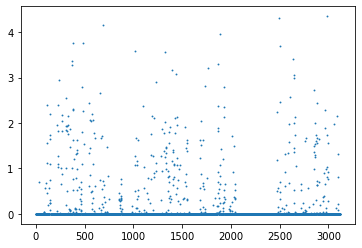

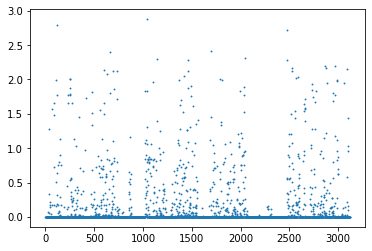

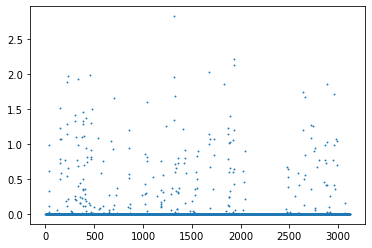

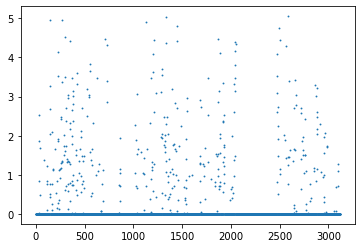

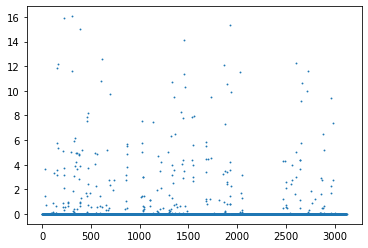

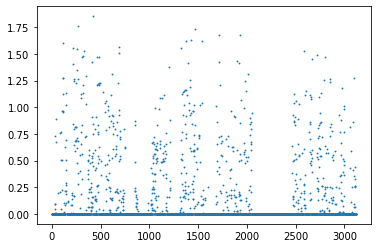

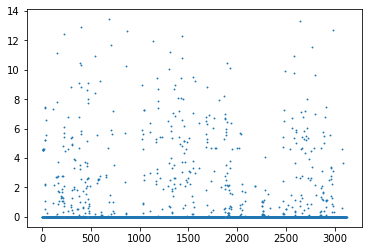

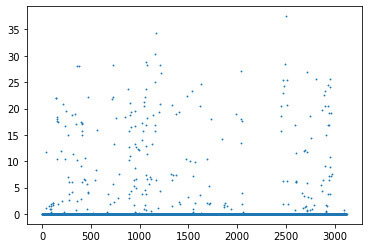

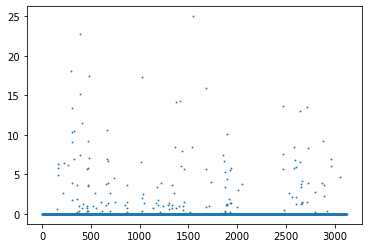

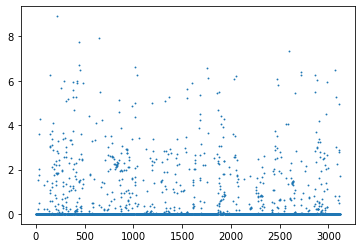

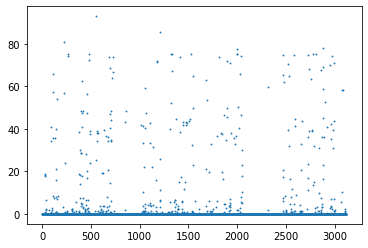

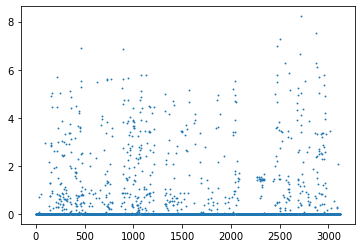

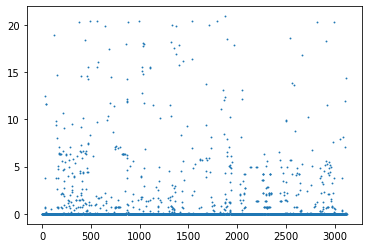

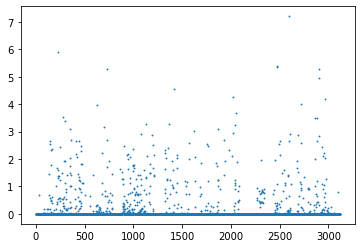

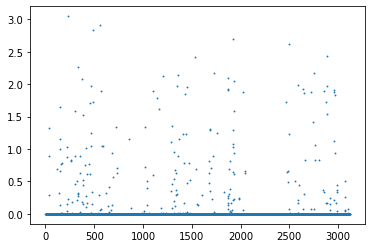

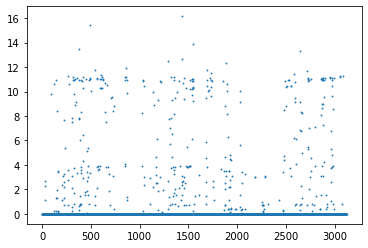

In [14]:
for i in range(20):
    plt.scatter( np.linspace(0,weights.shape[1],weights.shape[1] ), weights[i,:] , s = .75)
    plt.show()

(500, 3120)
(3120,)
0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
100
200
300
400
(3120, 3120)


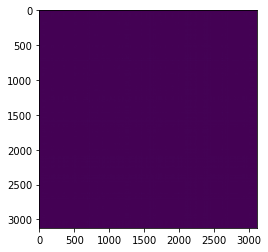

In [28]:
import networkx as nx

#thresh clusters to percentile of weights?
#intracluster link weight w1xw2 

print(weights.shape)
print(weights[cluster,:].shape)
for cluster in range( weights.shape[0]):
    if cluster % 100 == 0 :
        print(cluster)
    if cluster == 0:
        linkmat = np.outer( weights[cluster,:], weights[cluster,:] )
        print(linkmat)
    else:
        linkmat += np.outer( weights[cluster,:], weights[cluster,:] )
print(linkmat.shape)

#distribution of interresidue linkages w no thresh to provide a pvalue

#reconstruct the distmat




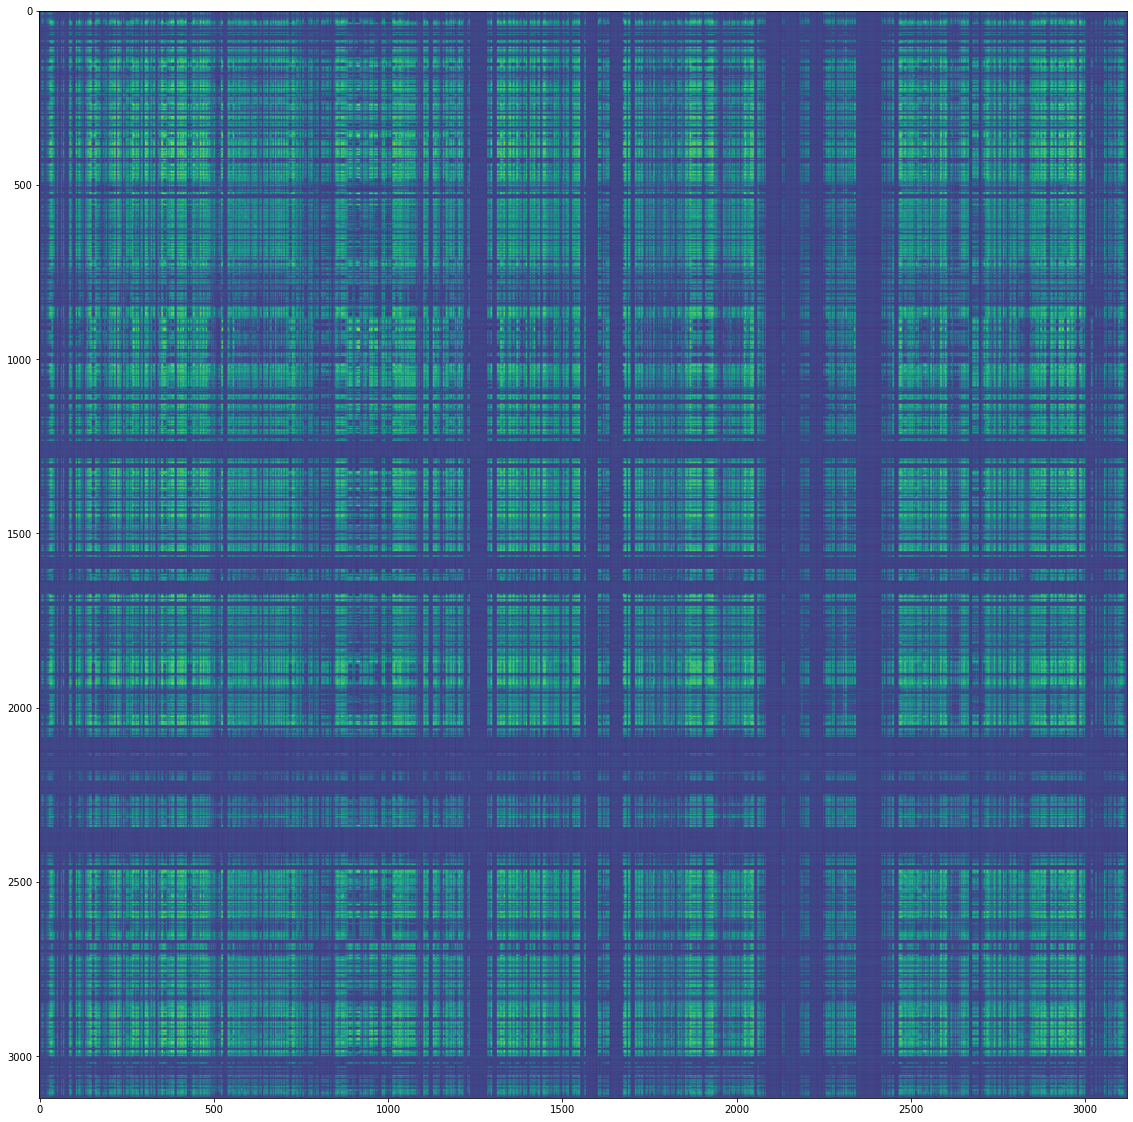

In [33]:
plt.figure( figsize=(20,20))
plt.imshow(np.log(linkmat))
plt.show()

In [91]:

#use RBM to extract coevovling pairs

#use non negative sparse rbm
from tfrbm import BBRBM, GBRBM , reg_rbm
"""
bbrbm = reg_rbm.RegRBM(n_visible=coevmat.shape[1], n_hidden=1000, t=.01, lam=.01, 
             learning_rate=.1, momentum=0.95, err_function="mse", 
             sample_visible=False, sigma=1.)
"""

try:
    globalmat = globalmat.todense()
except:
    pass

globalmat[globalmat>0] = 1
globalmat = globalmat.astype(np.int32)

#bbrbm = reg_rbm.RegRBM( n_visible=globalmat.shape[1] , n_hidden=1000,  learning_rate = .005 )
#bbrbm = reg_rbm.RegRBM( n_visible=globalmat.shape[1] , n_hidden=1000,  learning_rate = .005 )
bbrbm = GBRBM( n_visible=globalmat.shape[1] , n_hidden=1000,  learning_rate = .005 )
errs = bbrbm.fit(globalmat, n_epoches=10000, batch_size=200, shuffle=True, verbose=False )

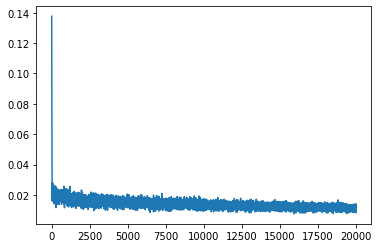

In [92]:
plt.plot(errs)

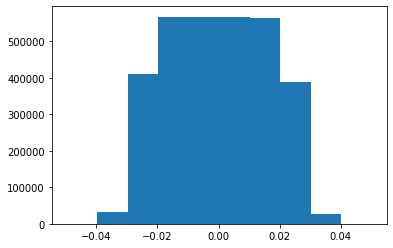

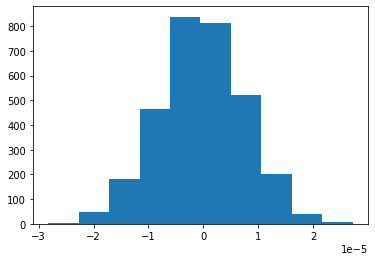

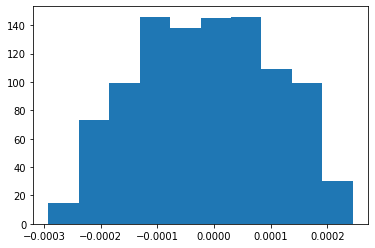

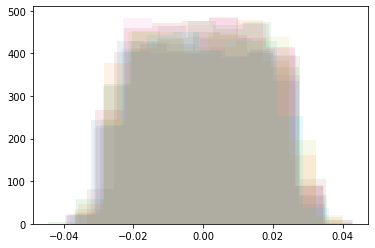

In [93]:
weights = bbrbm.get_weights()
for w in weights:
    plt.hist(w.ravel())
    plt.show()
weights_hidden2visible = weights[0]
for col in range(10):
    plt.hist( weights_hidden2visible[: , col ], alpha = .1 )
plt.show()

hidden unit: 0



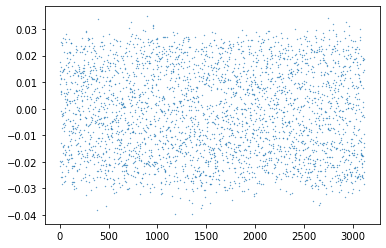

(0,)
(array([], dtype=int64),)


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


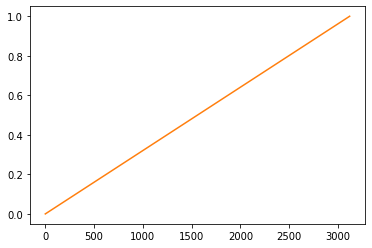

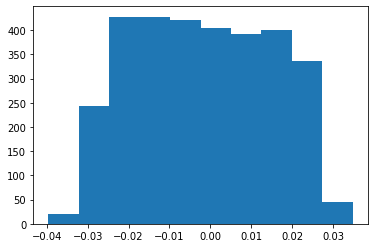

hidden unit: 1



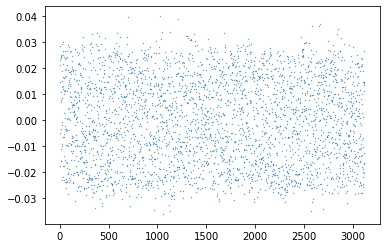

(0,)
(array([], dtype=int64),)


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


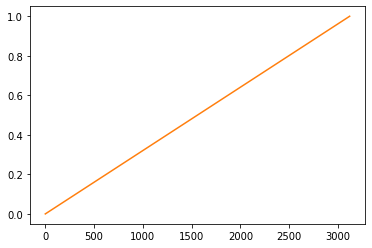

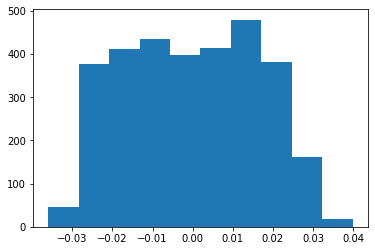

hidden unit: 2



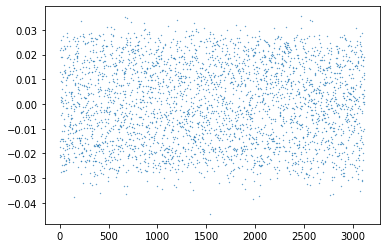

(0,)
(array([], dtype=int64),)


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


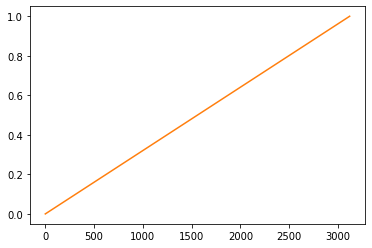

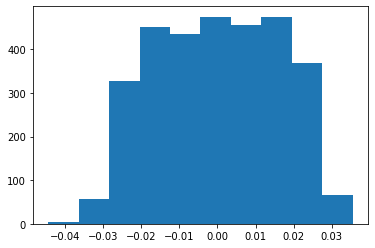

hidden unit: 3



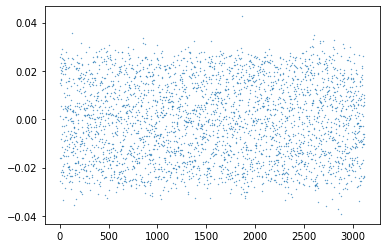

(0,)
(array([], dtype=int64),)


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


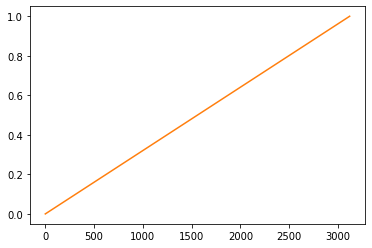

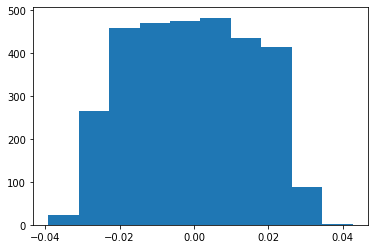

hidden unit: 4



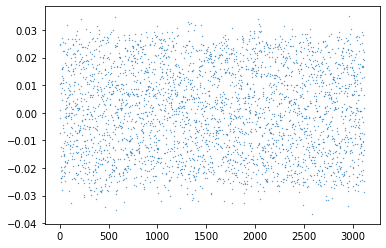

(0,)
(array([], dtype=int64),)


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


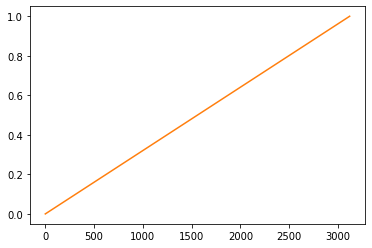

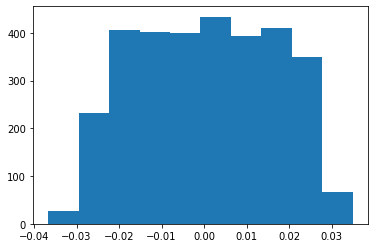

hidden unit: 5



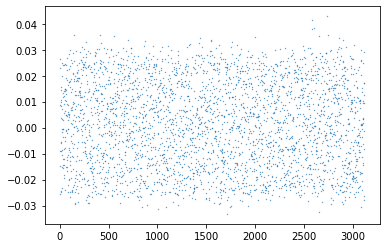

(0,)
(array([], dtype=int64),)


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


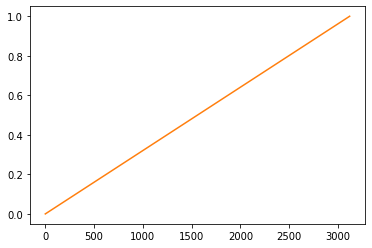

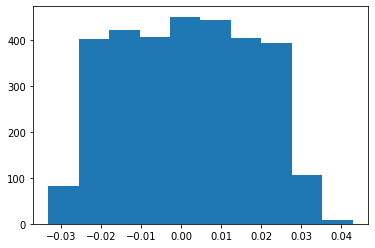

hidden unit: 6



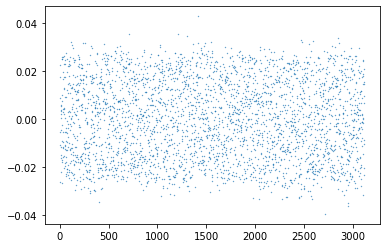

(0,)
(array([], dtype=int64),)


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


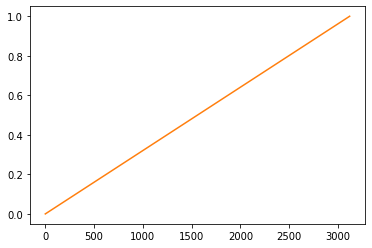

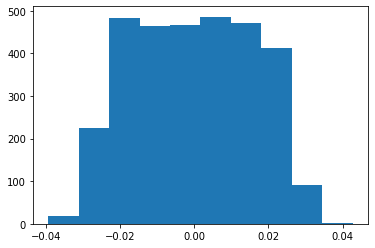

hidden unit: 7



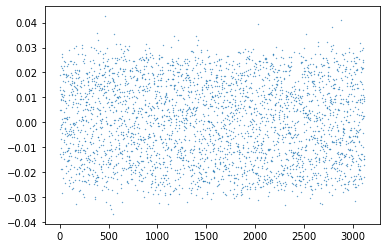

(0,)
(array([], dtype=int64),)


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


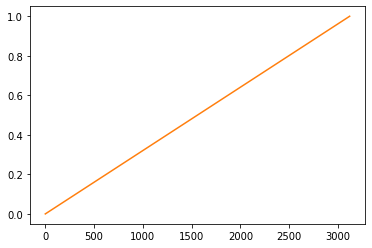

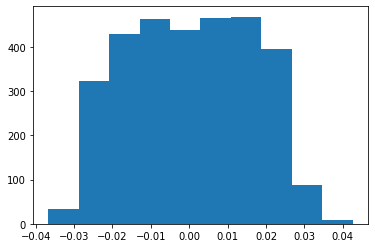

hidden unit: 8



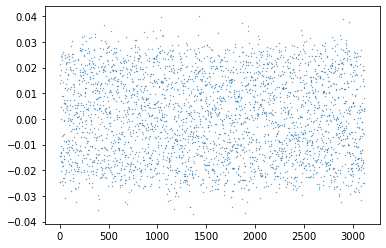

(0,)
(array([], dtype=int64),)


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


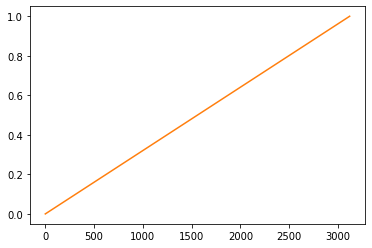

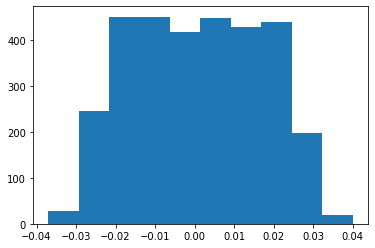

hidden unit: 9



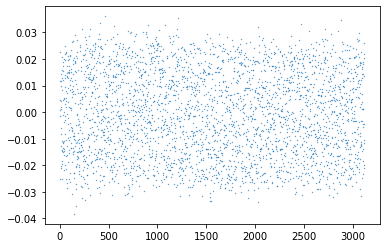

(0,)
(array([], dtype=int64),)


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


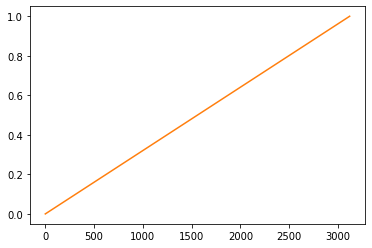

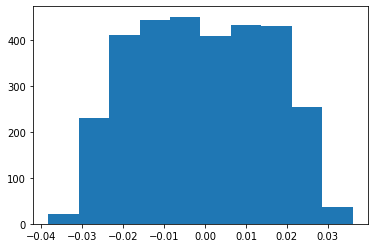

hidden unit: 10



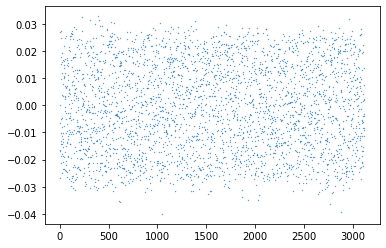

(0,)
(array([], dtype=int64),)


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


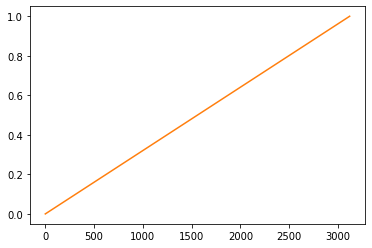

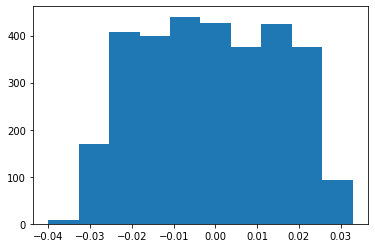

hidden unit: 11



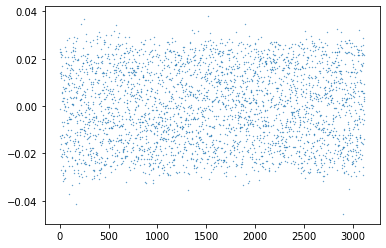

(0,)
(array([], dtype=int64),)


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


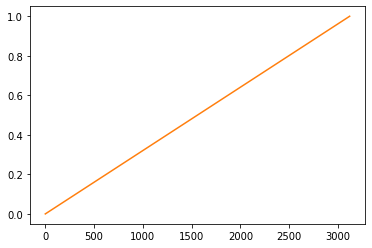

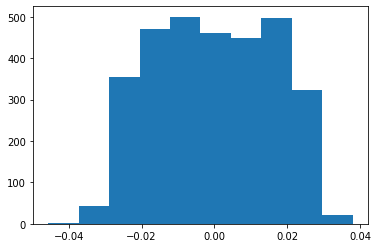

hidden unit: 12



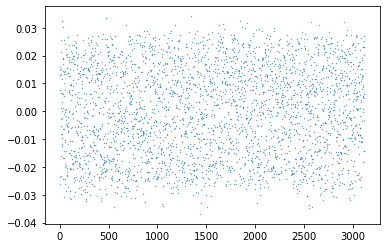

(0,)
(array([], dtype=int64),)


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


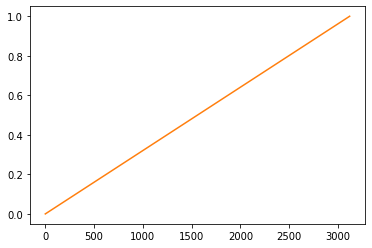

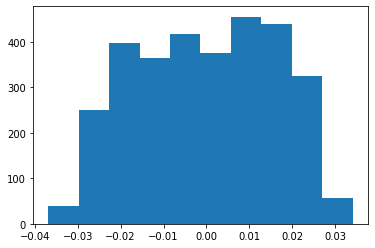

hidden unit: 13



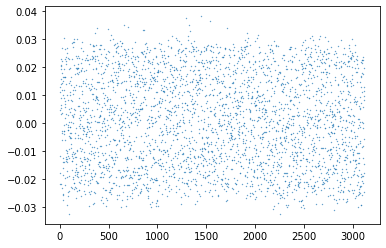

(0,)
(array([], dtype=int64),)


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


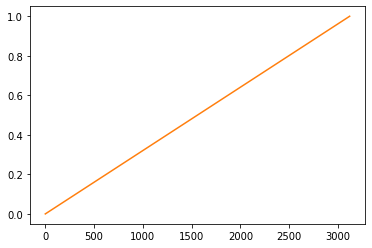

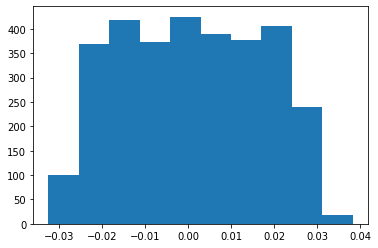

hidden unit: 14



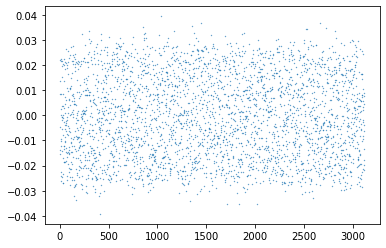

(0,)
(array([], dtype=int64),)


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


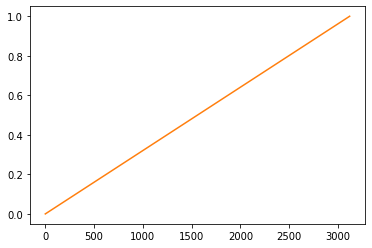

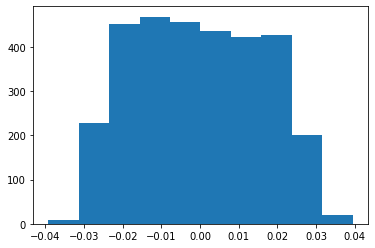

hidden unit: 15



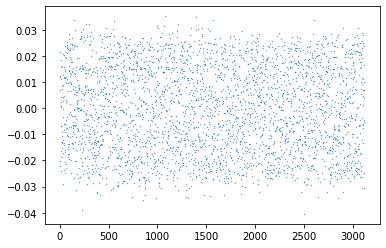

(0,)
(array([], dtype=int64),)


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


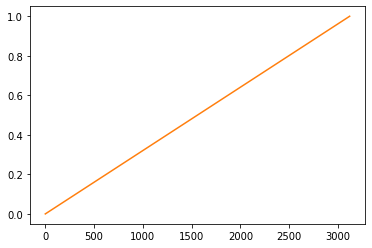

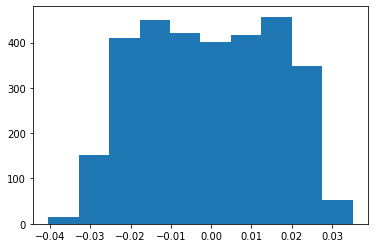

hidden unit: 16



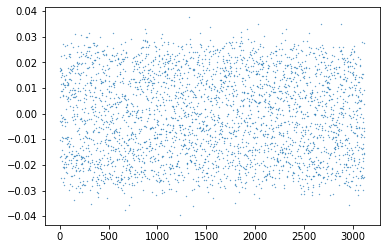

(0,)
(array([], dtype=int64),)


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


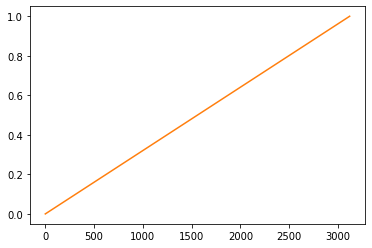

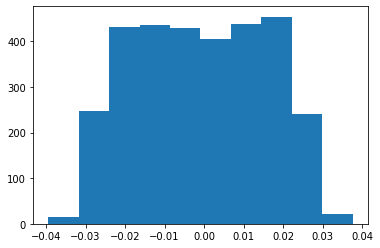

hidden unit: 17



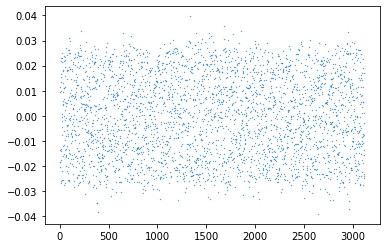

(0,)
(array([], dtype=int64),)


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


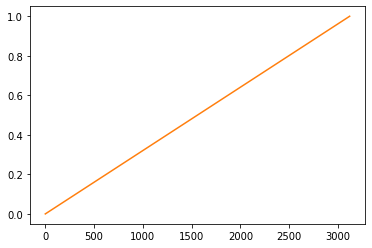

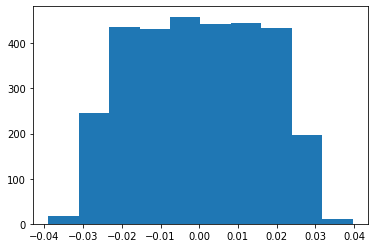

hidden unit: 18



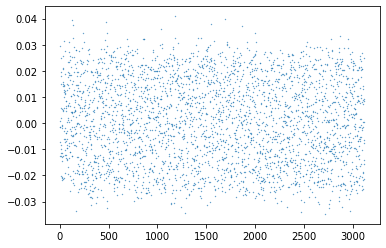

(0,)
(array([], dtype=int64),)


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


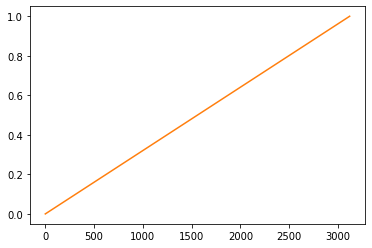

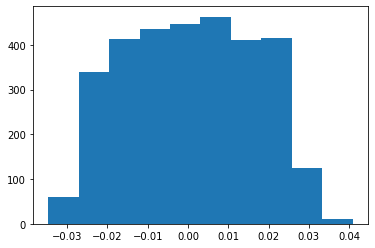

hidden unit: 19



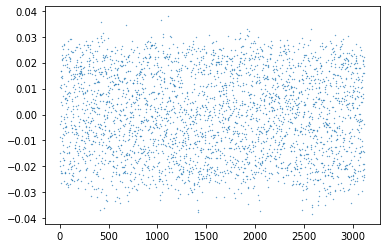

(0,)
(array([], dtype=int64),)


/home/cactuskid13/miniconda3/envs/pyprofiler3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


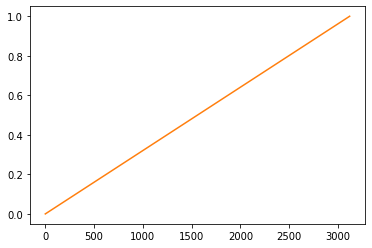

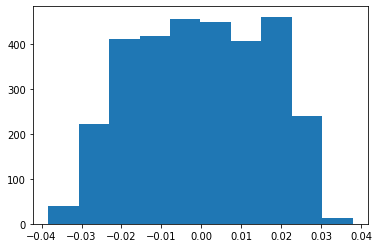

In [94]:
thresh = .05
weightlen = len(weights[0][:,1])
coords = np.linspace(0 , weightlen, num= weightlen )

for i in range(20):
    print('hidden unit:' , i)
    print('')
    #plt.scatter(coords, np.log( np.abs(weights[0][:,i]) ) , s=.1)
    plt.scatter(coords, weights[0][:,i]  , s=.1)
    plt.show()
    cluster = np.where(np.abs(weights[0][:,i])>thresh)
    print(cluster[0].shape)
    print(cluster)
    
    dummy = np.zeros(weights[0][:,i].shape)
    
    dummy[cluster[0]]=1
    
    cdf = np.array( np.cumsum(dummy) / np.sum(dummy))
    plt.plot( cdf )
    plt.plot(np.linspace(0,1,len(dummy)))
    plt.show()
    plt.hist(weights[0][:,i])
    plt.show()
    #spatial distribution of cluster
    
    
    